In [1]:
import tensorflow as tf

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [6]:
d_train = pd.read_csv('train.csv')
print(d_train.shape)
d_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d_test = pd.read_csv('test.csv')
print(d_test.shape)
d_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = d_train.drop(columns = 'label')
y = d_train['label']
X.shape, y.shape

((42000, 784), (42000,))

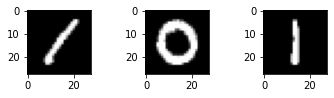

In [9]:
for i in range(0, 3):
    plt.subplot(330 + (i+1))
    plt.imshow(X.to_numpy()[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # plt.title(y_train[i])

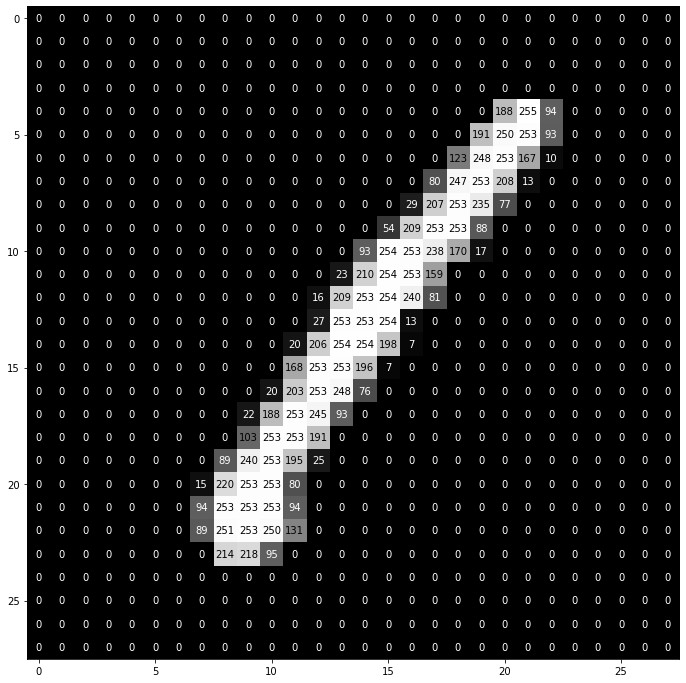

In [10]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X.to_numpy()[0].reshape(28, 28), ax)

In [11]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X = X.values.reshape(-1,28,28,1)

# split into train, val datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800,), (4200,))

In [ ]:
# pre-process ---------------

# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()

# X_val = X_val.to_numpy()
# y_val = y_val.to_numpy()

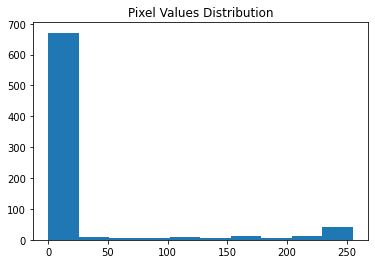

In [12]:
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Values Distribution")
plt.show()

In [13]:
# normalize -------------------------

X_train = X_train / 255.0
X_val = X_val / 255.0

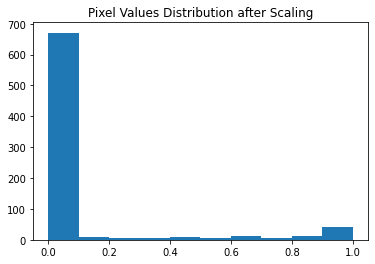

In [14]:
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Values Distribution after Scaling")
plt.show()

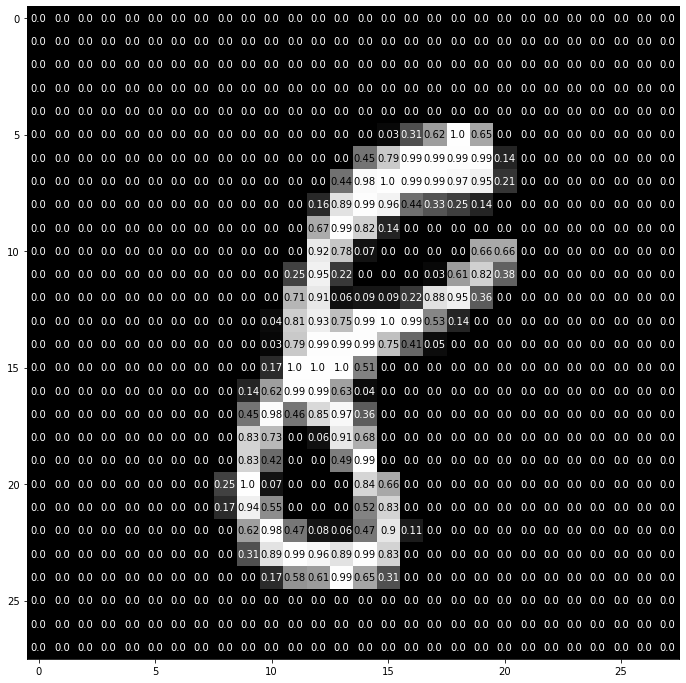

In [15]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0].reshape(28, 28), ax)

In [16]:
# skirtingu klasiu unique kintamuju skaicius
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([3724, 4213, 3757, 3845, 3675, 3456, 3735, 3963, 3660, 3772],
       dtype=int64))

In [17]:
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

y_train.shape, y_val.shape

((37800, 10), (4200, 10))

In [18]:
y_train[0] # 8

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [19]:
# modelio kurimas

model = keras.Sequential([
    layers.InputLayer(input_shape = (28,28,1)),
    layers.Conv2D(filters = 32, kernel_size = (4,4), activation  = 'relu'),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])

In [20]:
model = keras.Sequential([
    layers.InputLayer(input_shape = (28,28,1)),
    layers.Conv2D(filters = 32, kernel_size = (4,4), activation  = 'relu'),
    layers.Conv2D(filters = 64, kernel_size = (5,5), activation  = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])

In [21]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                64010     
                                                                 
Total params: 115,818
Trainable params: 115,818
Non-trainable params: 0
________________________________________________

In [23]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [24]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

gen_batch = datagen.flow(X_train, y_train, batch_size=128)

# 10 laipsniu rotation, 10% zoom, vertical ir horizontal shift 10%, vertical/horizontal flip nera gerai naudoti nes 6 ir 9 gali blogai klasifikuoti

In [126]:
# history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
#                     validation_data=val_batches, validation_steps=val_batches.n)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping],
    verbose='auto'
)
# history = model.fit(gen_batch,
#                     epochs = 25,
#                     validation_data = (X_val, y_val),
#                     verbose = 'auto',
#                     callbacks=[early_stopping])

Epoch 1/100
296/296 [==============================] - 3s 9ms/step - loss: 0.2436 - accuracy: 0.9271 - val_loss: 0.0812 - val_accuracy: 0.9774
Epoch 2/100
296/296 [==============================] - 3s 9ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0603 - val_accuracy: 0.9836
Epoch 3/100
296/296 [==============================] - 3s 9ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 4/100
296/296 [==============================] - 3s 8ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 5/100
296/296 [==============================] - 3s 9ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 6/100
296/296 [==============================] - 2s 8ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0400 - val_accuracy: 0.9881
Epoch 7/100
296/296 [==============================] - 2s 8ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0426 - val_accuracy: 0.9876

In [161]:
history = model.fit(gen_batch,
                    epochs = 100,
                    validation_data = (X_val, y_val),
                    verbose = 'auto',
                    callbacks=[early_stopping])

Epoch 1/100
296/296 [==============================] - 5s 16ms/step - loss: 0.4645 - accuracy: 0.8544 - val_loss: 0.0960 - val_accuracy: 0.9695
Epoch 2/100
296/296 [==============================] - 4s 15ms/step - loss: 0.1729 - accuracy: 0.9502 - val_loss: 0.0691 - val_accuracy: 0.9774
Epoch 3/100
296/296 [==============================] - 4s 15ms/step - loss: 0.1273 - accuracy: 0.9620 - val_loss: 0.0467 - val_accuracy: 0.9874
Epoch 4/100
296/296 [==============================] - 4s 15ms/step - loss: 0.1004 - accuracy: 0.9700 - val_loss: 0.0430 - val_accuracy: 0.9867
Epoch 5/100
296/296 [==============================] - 4s 15ms/step - loss: 0.0888 - accuracy: 0.9739 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 6/100
296/296 [==============================] - 4s 15ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0426 - val_accuracy: 0.9855
Epoch 7/100
296/296 [==============================] - 4s 15ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0344 - val_accuracy:

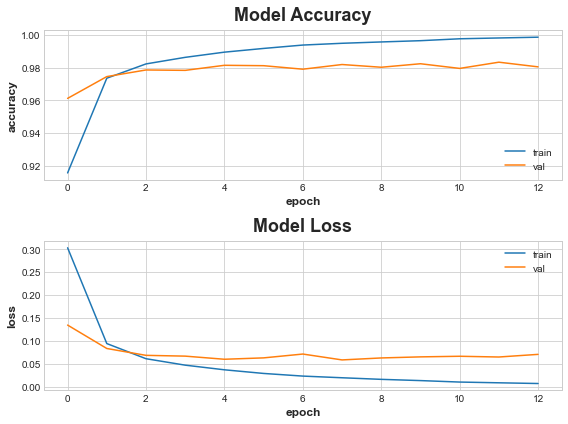

In [163]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

In [94]:
d_test.shape

(28000, 784)

In [95]:
test = d_test.values.reshape(-1,28,28,1)

In [162]:
results = model.predict(test)

# paimam is onehot indeksa su max prox
results = np.argmax(results, axis = 1)

results = pd.Series(results, name="Label")

submission = pd.concat([pd.Series(range(1,len(results) + 1), name = "ImageId"),results], axis = 1)

submission.to_csv("CNN3_1xAug.csv",index=False)

In [1]:
# ------------------------------------------

In [2]:
import base64
import numpy as np

In [79]:
from concurrent.futures import ThreadPoolExecutor
import concurrent
from time import sleep, time
import numpy as np
from tqdm import tqdm
 
values = list(range(10000))#[3,4,5,6,6,8,9,10]
newlist = []
 
def cube(x):
    global newlist
    # sleep(np.random.randint(1,5))
    newlist.append([x]*1000)
    #return f"yes{x}", 1#, [x]*1000
 
 
if __name__ == '__main__':
    result =[]
#     with ThreadPoolExecutor(max_workers=5) as exe:
#         exe.submit(cube,2)
         
#         # Maps the method 'cube' with a list of values.
#         result = exe.map(cube,values)
    start = time()
    with tqdm(total = len(values), desc = "Executing Pipeline",
          unit = " Augmentations") as progress_bar:
            with ThreadPoolExecutor(max_workers = None) as executor:
                results = executor.map(cube, values)
                results = [executor.submit(cube, v) for v in values]
                for r in concurrent.futures.as_completed(results):
                    fname, res_mult, res = r.result()
                    progress_bar.set_description("Processing %s" % fname)
                    progress_bar.update(res_mult)
                    newlist.append(res)
    #             for fname, res_mult in executor.map(cube, values):
    #                 # pass
    #                 progress_bar.set_description("Processing %s" % fname)
    #                 progress_bar.update(res_mult)
    with ThreadPoolExecutor(max_workers = None) as executor:
        executor.map(cube, values)
    
    stop = time()
    print(len(newlist))
    print("TIME: {}".format(stop-start))
    # for r in result:
    #     print(r)

10000
TIME: 0.4544386863708496


In [58]:
stop-start

3.295832633972168